<img src="https://cryptoholics.com/wp-content/uploads/Binance-Coin.png">

Here, we are going to start by loading and exploring our dataset using pandas for data manipulation and numpy for numerical operations. We'll use matplotlib and seaborn to create visualizations that help us understand the data, such as plots for distributions, correlations, and patterns. To prepare our data for modeling, we'll handle missing values, encode categorical variables with LabelEncoder, and scale numerical features using StandardScaler. We’ll also apply PCA (Principal Component Analysis) to reduce the dimensionality of our data while keeping the most important features.

After preprocessing, we'll dive into machine learning using a variety of models. We'll test out different algorithms like Random Forest, Support Vector Machines (SVM), K-Nearest Neighbors, Decision Trees, and logistic regression for classification tasks, as well as linear regression models like Ridge and Lasso for regression tasks. Additionally, we’ll explore clustering techniques, such as KMeans and DBSCAN, to find natural groups within our data.

Next, we will build deep learning models using TensorFlow and Keras. We might start with basic neural networks using Dense layers and then experiment with more advanced architectures like Convolutional Neural Networks (CNNs) for image data or Recurrent Neural Networks (RNNs) and LSTM models for sequential data. We’ll train these models and evaluate their performance using different metrics to find the best approach for our problem.

By combining these techniques, we aim to find the most effective way to analyze and model our dataset, whether it's through traditional machine learning methods or more advanced deep learning approaches.

In [2]:

import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates



from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, classification_report, silhouette_score, 
                             mean_absolute_error, mean_squared_error, r2_score, accuracy_score)

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR, SVC, OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans, DBSCAN


import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Dense, Dropout, Conv2D, MaxPooling2D, Flatten, 
                                     SimpleRNN, Embedding, LSTM, Input)


from sklearn.datasets import make_regression, make_classification


#### Reading the data


In [3]:
data = pd.read_csv('coin_BinanceCoin.csv')
df = pd.DataFrame(data)
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,200395.0,10513800.0
1,2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,344499.0,10773700.0
2,3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,342568.0,10406700.0
3,4,Binance Coin,BNB,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,340218.0,10781100.0
4,5,Binance Coin,BNB,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,224261.0,10641400.0


#### see what info we can achieve from the dataset

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        1442 non-null   int64  
 1   Name       1442 non-null   object 
 2   Symbol     1442 non-null   object 
 3   Date       1442 non-null   object 
 4   High       1442 non-null   float64
 5   Low        1442 non-null   float64
 6   Open       1442 non-null   float64
 7   Close      1442 non-null   float64
 8   Volume     1442 non-null   float64
 9   Marketcap  1442 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 112.8+ KB
None


#### coverting the Date column type from ```Object``` to ``` Date ``` and creating Yea, Month, Time, Hour, Minute columns and creating each variables 

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
date = df['Date']
df['year'] = date.dt.year
df['month'] = date.dt.month
df['time'] = date.dt.time
df['hour'] = date.dt.hour
df['minute'] = date.dt.minute

year = df['year']
month = df['month']
time = df['time']
hour = df['hour']
minute = df['minute']

In [6]:
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,year,month,time,hour,minute
0,1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,200395.0,10513800.0,2017,7,23:59:59,23,59
1,2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,344499.0,10773700.0,2017,7,23:59:59,23,59
2,3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,342568.0,10406700.0,2017,7,23:59:59,23,59
3,4,Binance Coin,BNB,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,340218.0,10781100.0,2017,7,23:59:59,23,59
4,5,Binance Coin,BNB,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,224261.0,10641400.0,2017,7,23:59:59,23,59


#### Check for an null info

In [7]:
print(data.isnull().sum())

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64


### Calculating the Statsistical Analysis for the columns which their type are ```Float64```

In [8]:
floats = df.select_dtypes(include=['float64'])
floats.describe()

,High,Low,Open,Close,Volume,Marketcap
count,1442.000000,1442.000000,1442.000000,1442.000000,1.442000e+03,1.442000e+03
mean,54.764100,49.165813,52.028231,52.250308,6.269804e+08,7.835575e+09
std,121.675817,108.118454,115.170060,115.390917,1.479775e+09,1.780041e+10
min,0.101211,0.096109,0.099721,0.099867,9.284190e+03,9.986680e+06
25%,10.390750,9.677340,10.037860,10.068350,5.089148e+07,1.157863e+09
50%,16.592114,15.727250,16.210328,16.210569,1.981830e+08,2.451099e+09
75%,28.240910,26.963038,27.669888,27.691107,3.942378e+08,4.061743e+09
max,690.931965,631.465298,676.315905,675.684077,1.798295e+10,1.036722e+11


In this code, we begin by handling missing data in our DataFrame `df` using `dropna()` to remove any rows with missing values. We then encode all categorical columns using `LabelEncoder`, converting them into numerical format suitable for machine learning models. Next, we select only the numeric columns (`int64` and `float64`) and apply `StandardScaler` to normalize the data, ensuring all features have a mean of 0 and a standard deviation of 1. After scaling, we use Principal Component Analysis (PCA) to reduce the dimensionality of the dataset to 2 principal components, capturing the most important variance in the data. We create a DataFrame `pca_df` for these two components and visualize the results using a scatter plot with `seaborn`, allowing us to observe how the data clusters or distributes along these two principal components.

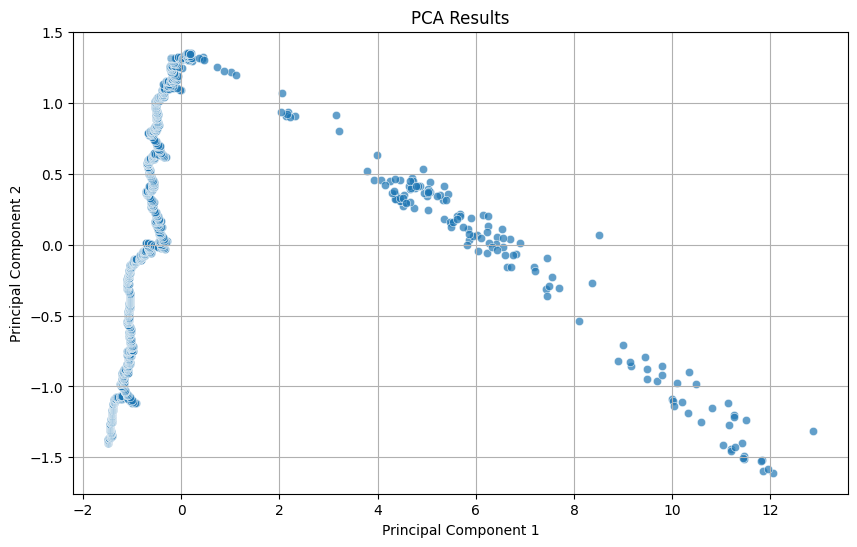

In [9]:
df.dropna(inplace=True)

label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


numeric_df = df.select_dtypes(include=['int64', 'float64'])

scaler = StandardScaler()
features_scaled = scaler.fit_transform(numeric_df)

pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

pca_df = pd.DataFrame(data=features_pca, columns=['PC1', 'PC2'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.7)
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

This code creates a series of bar plots to visualize different financial metrics over time using `matplotlib`. It sets up a grid of six subplots arranged in three rows and two columns, with each subplot displaying aggregated data from the `df` DataFrame. The first subplot shows the total trading volume per year, while the second depicts the average market capitalization per year. The third and fourth subplots illustrate the average high and low prices by month, respectively. The fifth and sixth subplots present the average opening and closing prices per year. Each plot is customized with titles, axis labels, and different colors to make the data visually distinguishable. Finally, `plt.tight_layout()` adjusts the spacing between plots for a cleaner presentation, and `plt.show()` displays all the plots together in one figure.

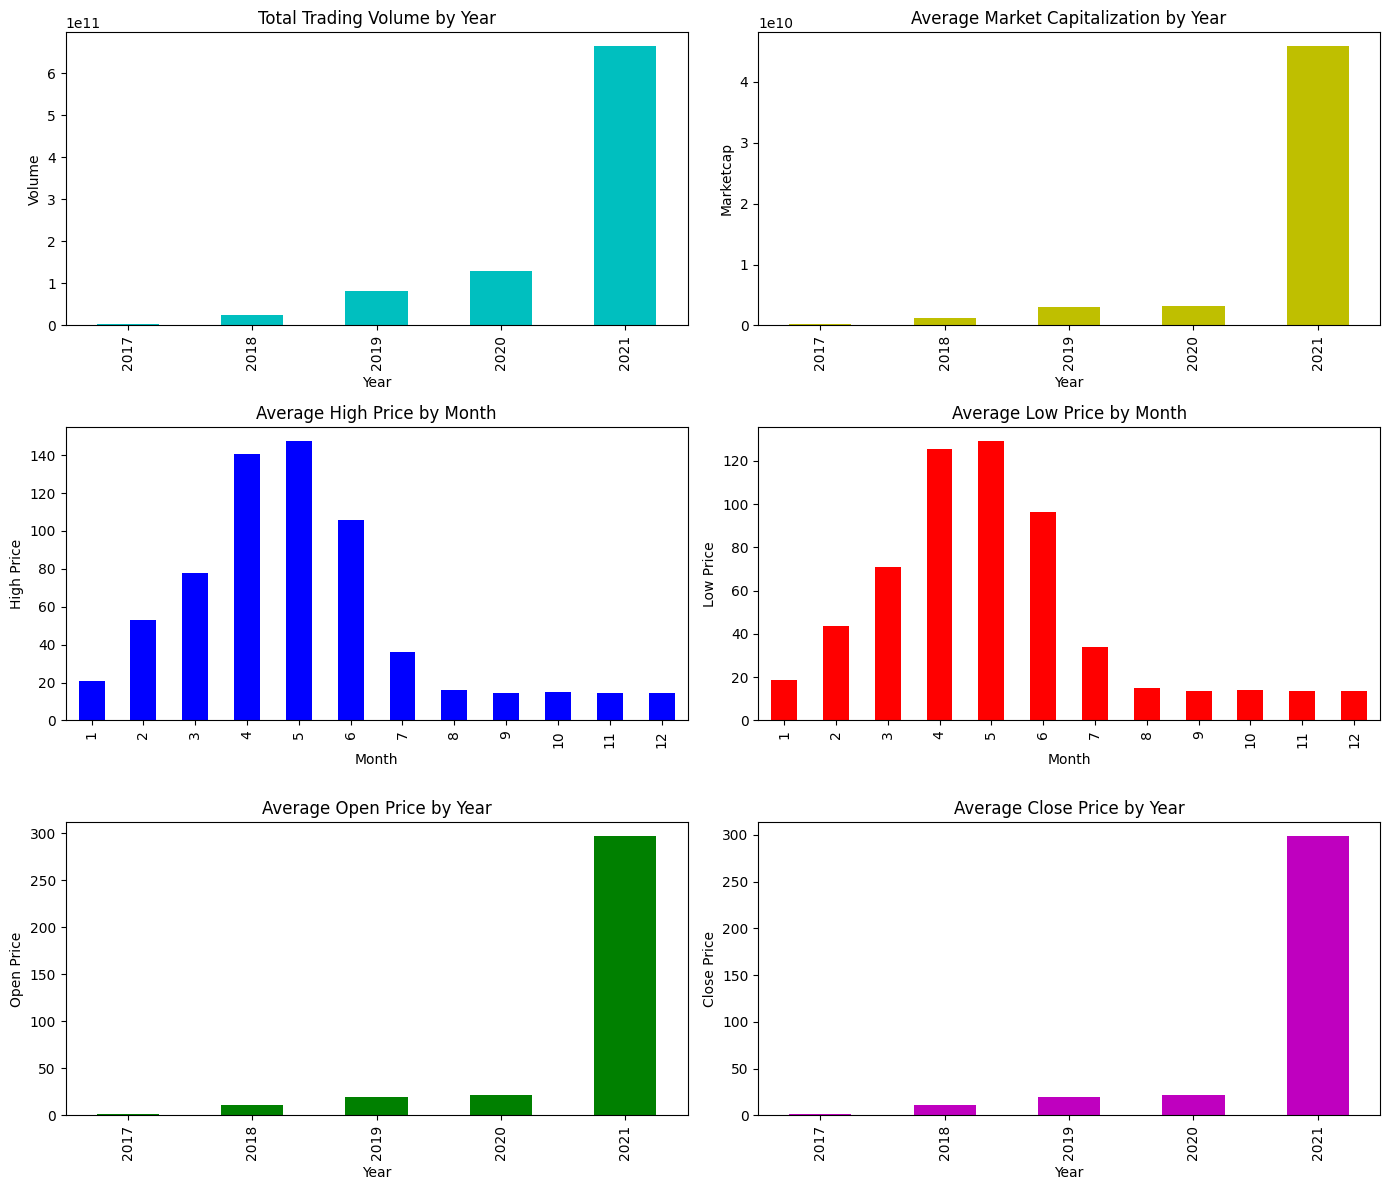

In [10]:
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

df.groupby('year')['Volume'].sum().plot(kind='bar', ax=axs[0, 0], color='c')
axs[0, 0].set_title('Total Trading Volume by Year')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Volume')


df.groupby('year')['Marketcap'].mean().plot(kind='bar', ax=axs[0, 1], color='y')
axs[0, 1].set_title('Average Market Capitalization by Year')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Marketcap')

df.groupby('month')['High'].mean().plot(kind='bar', ax=axs[1, 0], color='b')
axs[1, 0].set_title('Average High Price by Month')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('High Price')

df.groupby('month')['Low'].mean().plot(kind='bar', ax=axs[1, 1], color='r')
axs[1, 1].set_title('Average Low Price by Month')
axs[1, 1].set_xlabel('Month')
axs[1, 1].set_ylabel('Low Price')

df.groupby('year')['Open'].mean().plot(kind='bar', ax=axs[2, 0], color='g')
axs[2, 0].set_title('Average Open Price by Year')
axs[2, 0].set_xlabel('Year')
axs[2, 0].set_ylabel('Open Price')

df.groupby('year')['Close'].mean().plot(kind='bar', ax=axs[2, 1], color='m')
axs[2, 1].set_title('Average Close Price by Year')
axs[2, 1].set_xlabel('Year')
axs[2, 1].set_ylabel('Close Price')

plt.tight_layout()
plt.show()

This code performs a correlation analysis and visualizes the relationships between several numerical variables in the DataFrame `df`. It first calculates the correlation matrix for selected financial variables (`High`, `Low`, `Open`, `Close`, `Volume`, and `Marketcap`) to measure the strength and direction of their linear relationships. A heatmap is then created using `seaborn` to display this matrix, with color gradients indicating the magnitude of the correlations and annotation for clarity. 

Next, a pair plot is generated using `seaborn` to create scatter plots for every combination of the selected variables. This helps visualize potential patterns, trends, or relationships between variables, providing a comprehensive overview of how these features interact with each other. The `plt.suptitle` function adds a title to the entire pair plot for better understanding and context. Both visualizations are displayed sequentially to offer insights into the correlations and distributions among the numerical features.

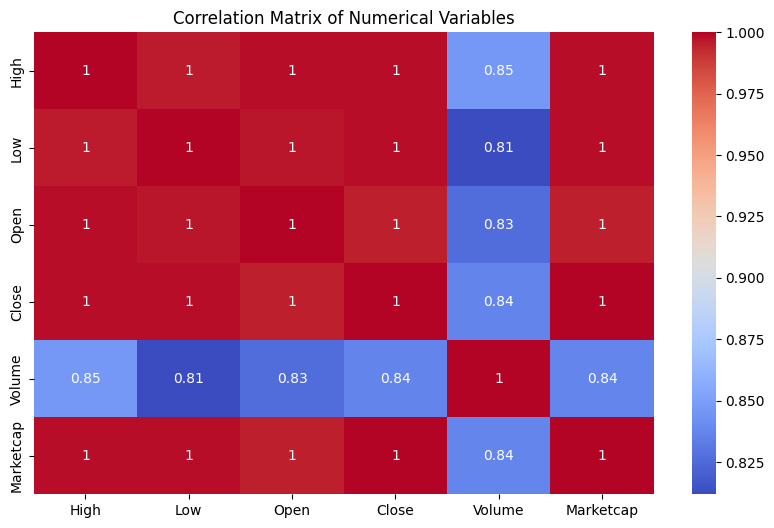

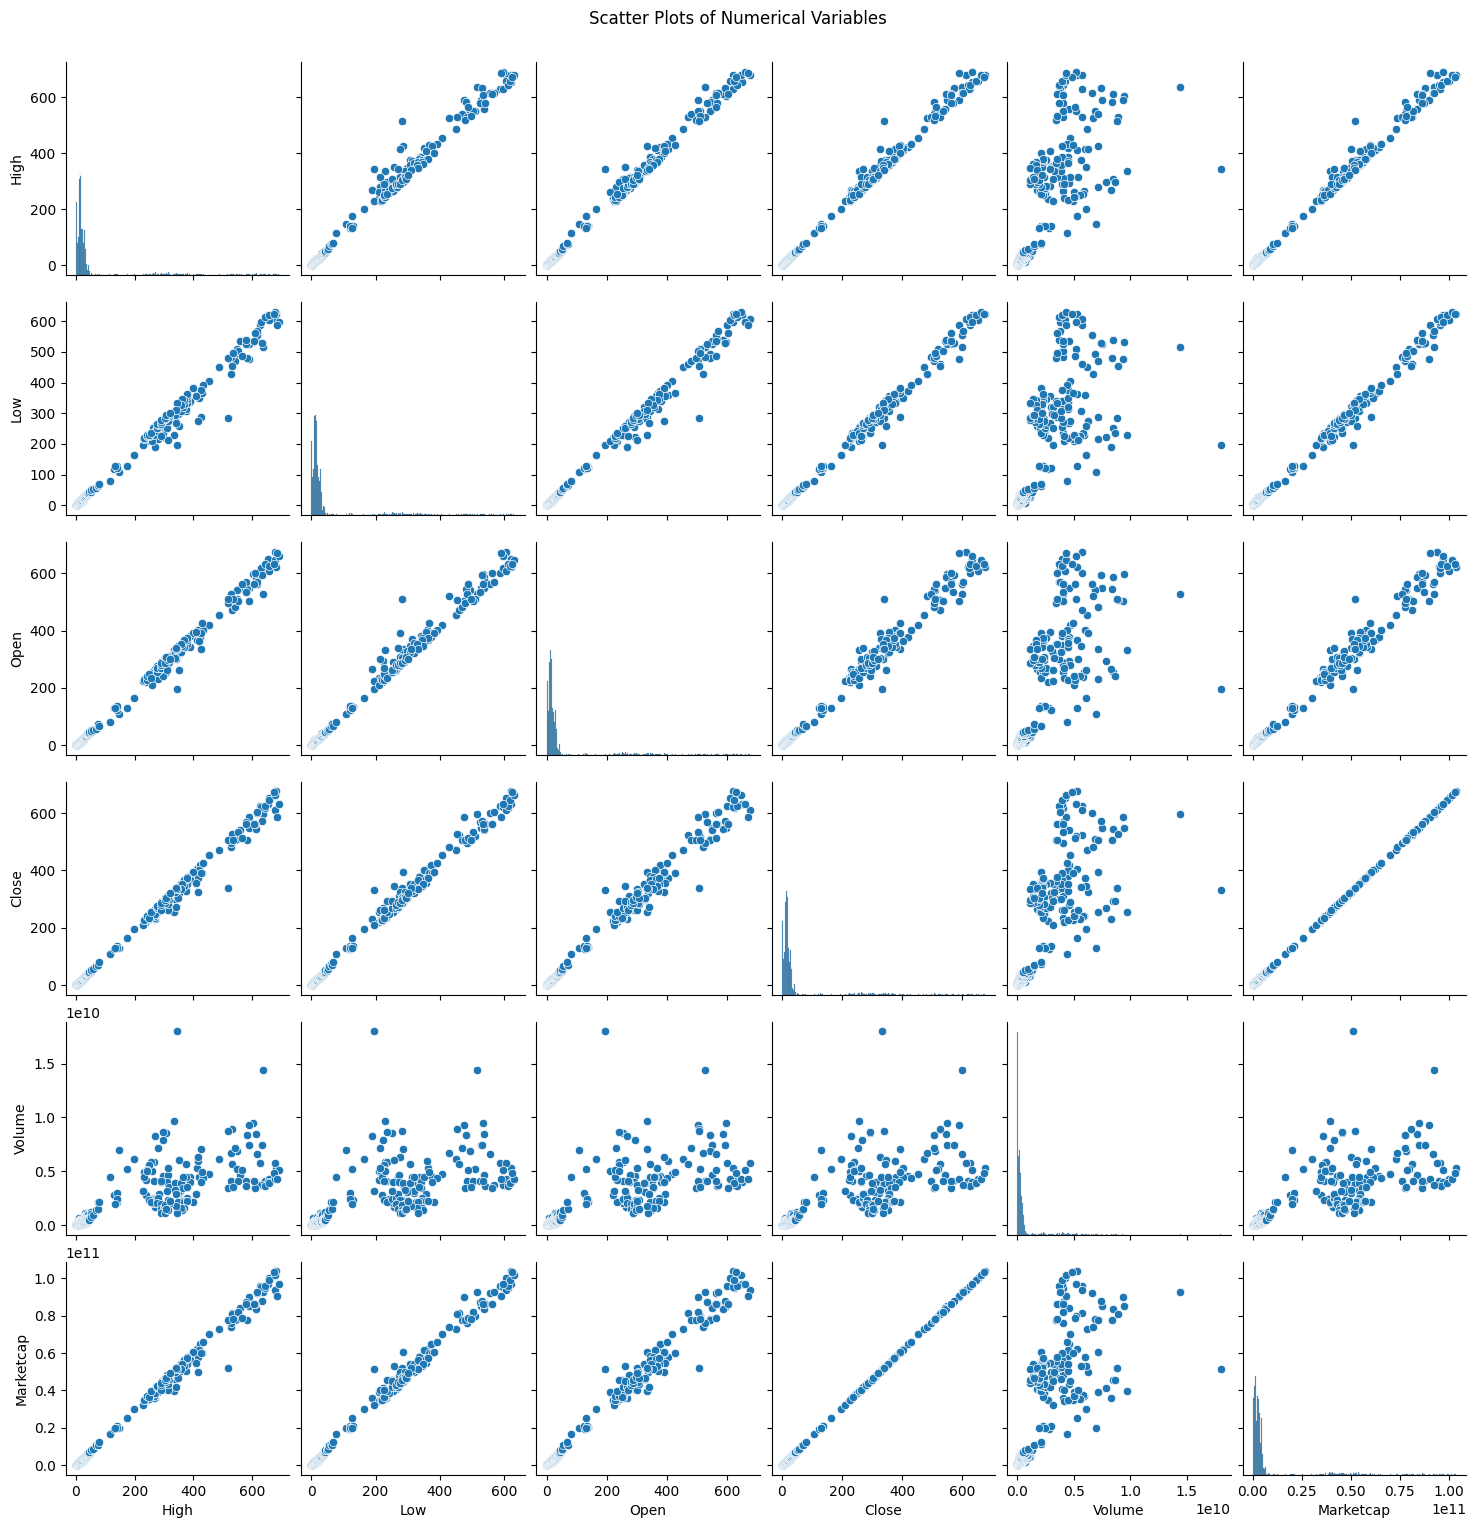

In [11]:
plt.figure(figsize=(10, 6))
corr_matrix = df[['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

sns.pairplot(df[['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']])
plt.suptitle('Scatter Plots of Numerical Variables', y=1.02)
plt.show()


This code calculates two new metrics, `Daily Range` and `Daily Return`, to further analyze the financial data, and visualizes their distributions using histograms.

First, it computes the `Daily Range` for each trading day by subtracting the `Low` price from the `High` price, representing the difference between the highest and lowest prices within a single day. A histogram is then plotted with `seaborn` to show the distribution of this range across all days, with 30 bins for detail and a kernel density estimate (KDE) curve overlaid to visualize the overall shape and spread of the data.

Next, it calculates the `Daily Return` as the percentage change between the opening (`Open`) and closing (`Close`) prices of each day, providing insight into the daily profitability or loss in percentage terms. A similar histogram is created for `Daily Return`, allowing us to understand the frequency and distribution of daily returns in the dataset. Both histograms are labeled with titles and axis labels for clarity, providing a clear view of these key financial metrics.

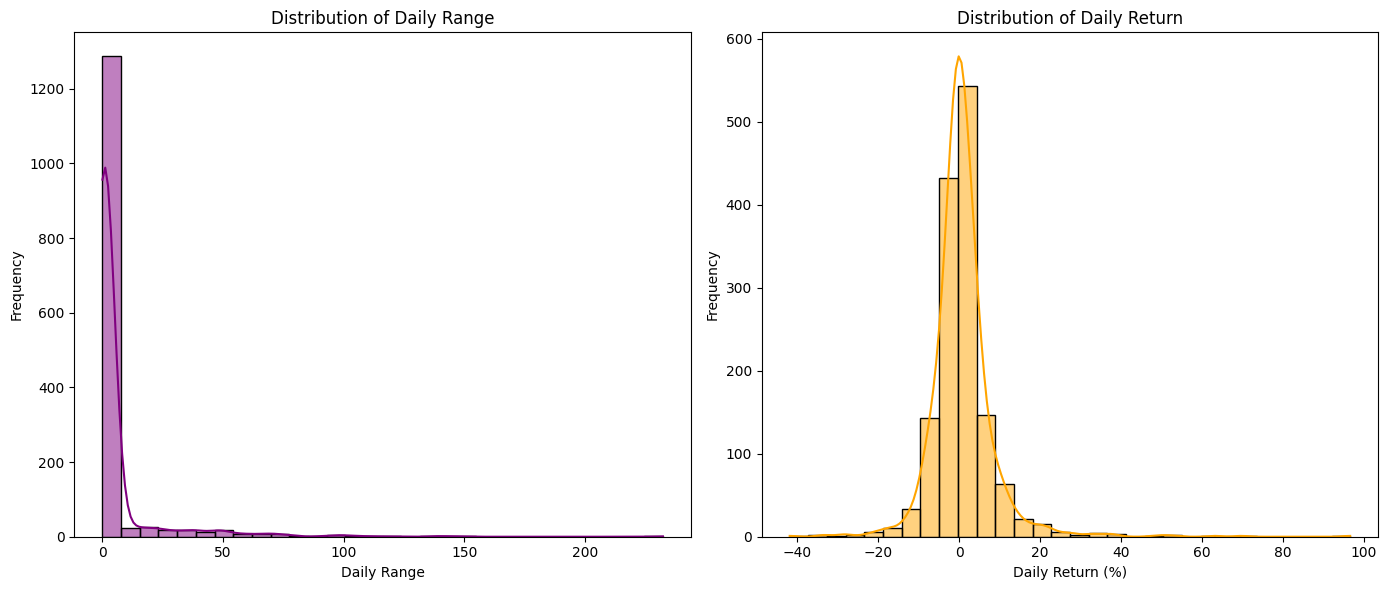

In [12]:
df['Daily Range'] = df['High'] - df['Low']
df['Daily Return'] = ((df['Close'] - df['Open']) / df['Open']) * 100

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df['Daily Range'], bins=30, kde=True, color='purple', ax=axs[0])
axs[0].set_title('Distribution of Daily Range')
axs[0].set_xlabel('Daily Range')
axs[0].set_ylabel('Frequency')

sns.histplot(df['Daily Return'], bins=30, kde=True, color='orange', ax=axs[1])
axs[1].set_title('Distribution of Daily Return')
axs[1].set_xlabel('Daily Return (%)')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



This code creates a series of six subplots to analyze different financial metrics over time. The first subplot shows the time series of the asset's closing prices, while the second adds 20-day and 50-day moving averages to highlight short- and long-term trends. The third subplot visualizes market volatility using a 20-day rolling standard deviation of the closing price. The fourth subplot displays the average closing price by month, providing insight into monthly trends. The fifth subplot illustrates the distribution of daily price changes, indicating the frequency of various daily movements. The last subplot is left empty, ensuring a clean layout for the overall visualization.

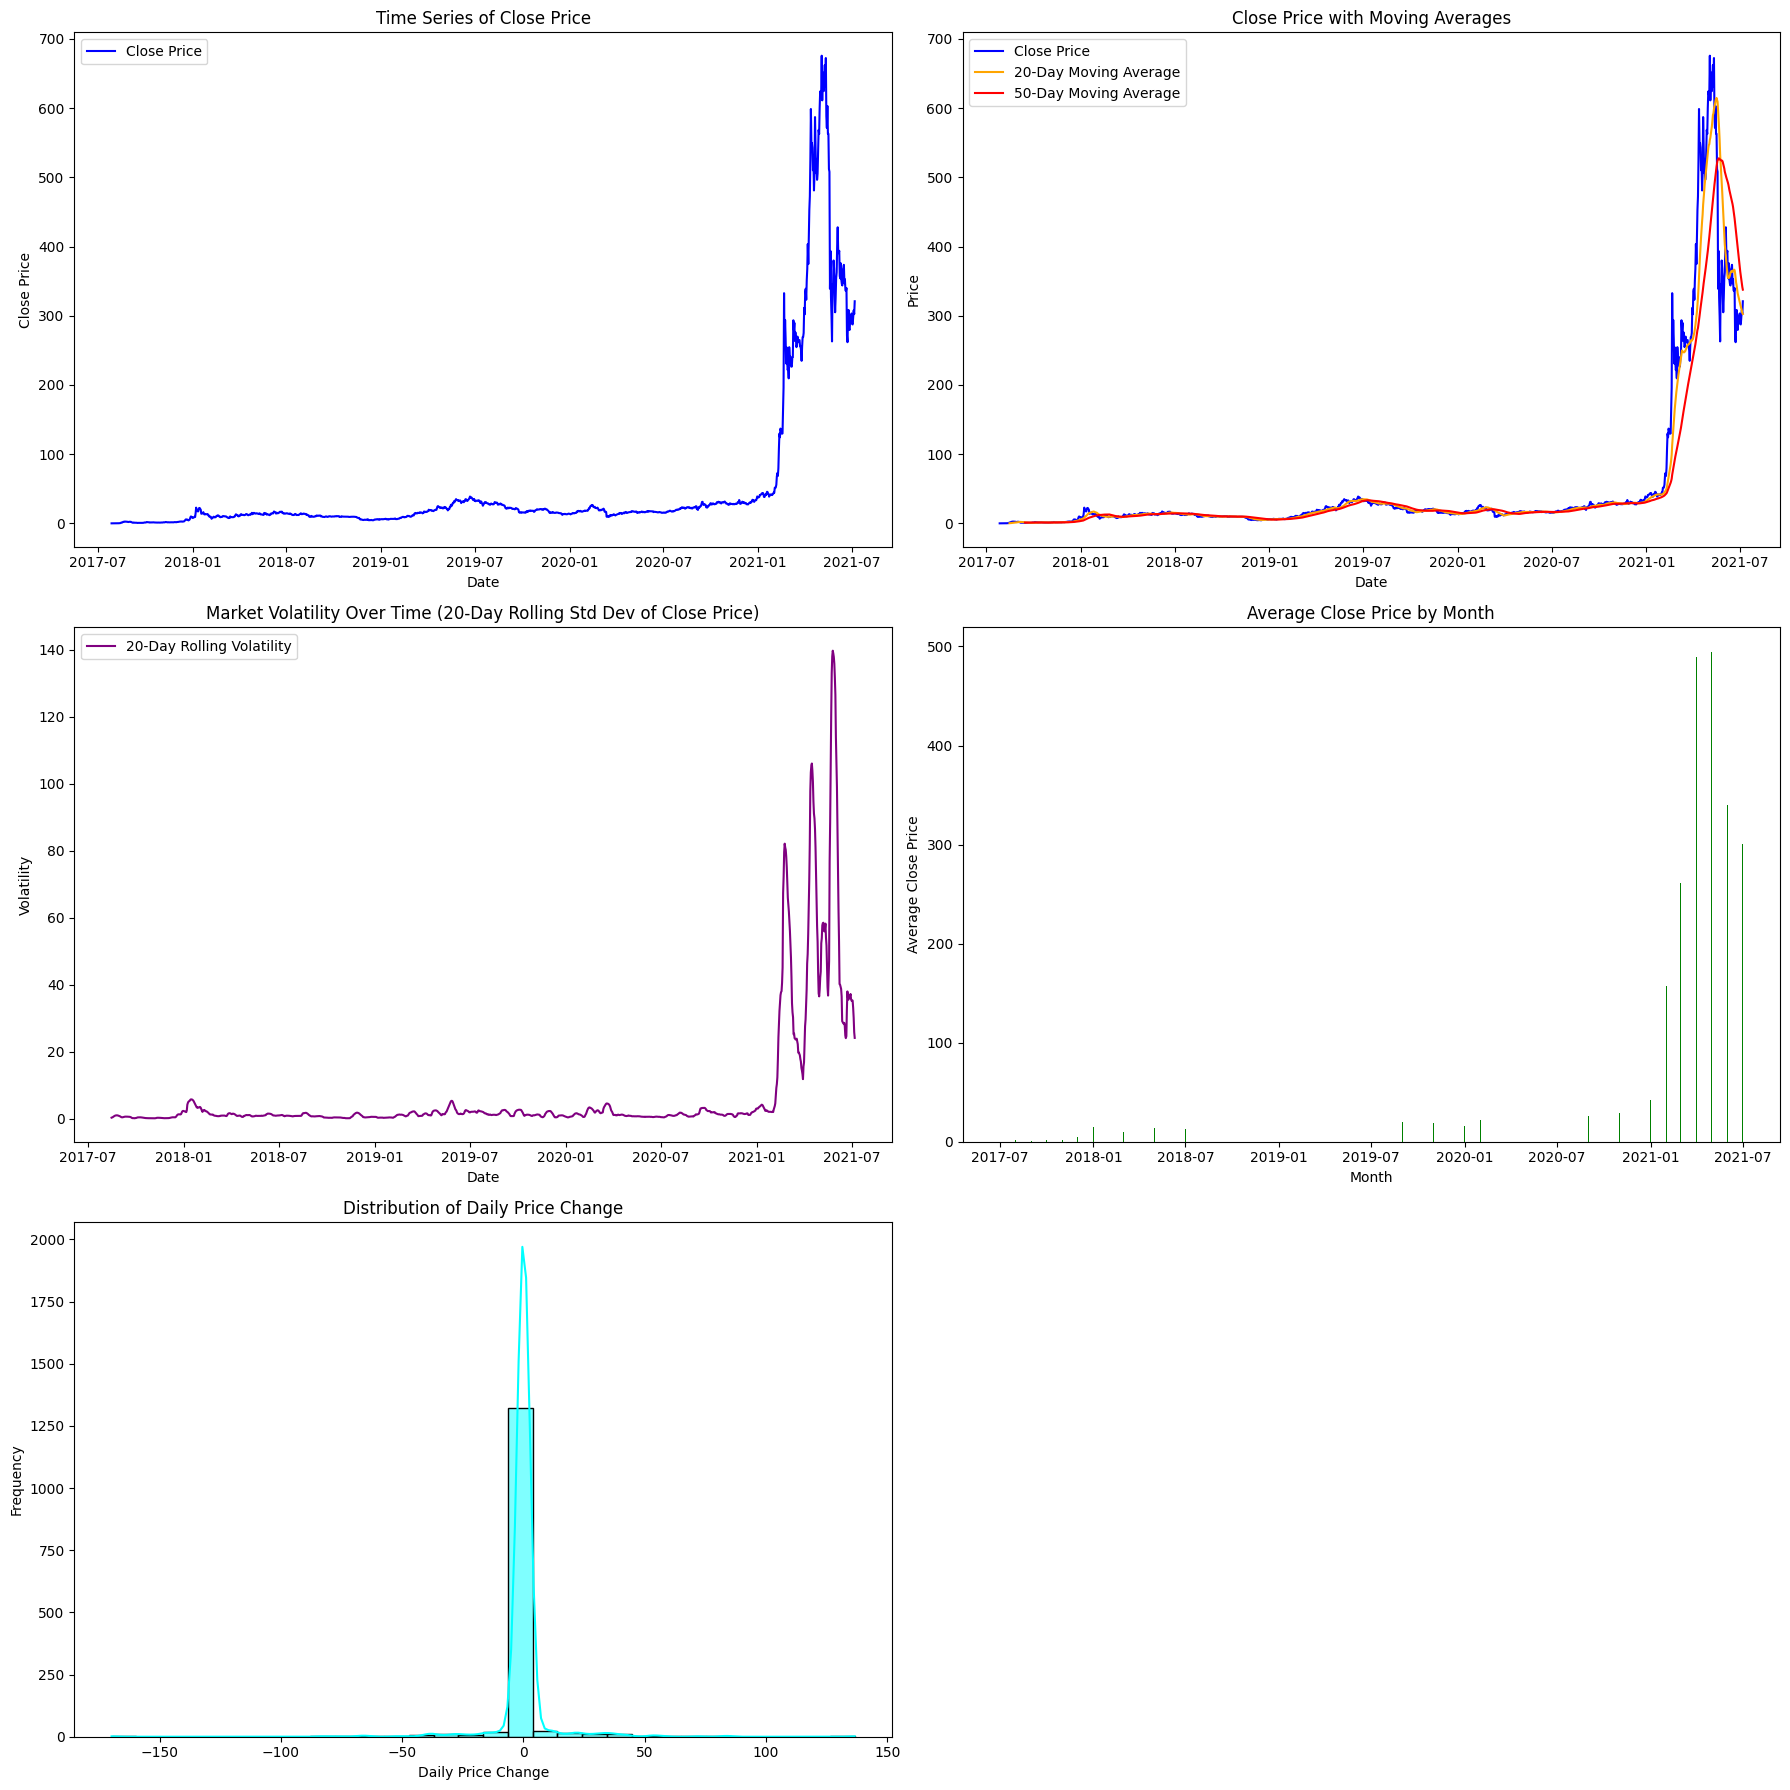

In [13]:
fig, axs = plt.subplots(3, 2, figsize=(18, 18))
axs[0, 0].plot(df['Date'], df['Close'], label='Close Price', color='blue')
axs[0, 0].set_title('Time Series of Close Price')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Close Price')
axs[0, 0].legend()
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()
axs[0, 1].plot(df['Date'], df['Close'], label='Close Price', color='blue')
axs[0, 1].plot(df['Date'], df['MA_20'], label='20-Day Moving Average', color='orange')
axs[0, 1].plot(df['Date'], df['MA_50'], label='50-Day Moving Average', color='red')
axs[0, 1].set_title('Close Price with Moving Averages')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Price')
axs[0, 1].legend()
df['Volatility'] = df['Close'].rolling(window=20).std()
axs[1, 0].plot(df['Date'], df['Volatility'], label='20-Day Rolling Volatility', color='purple')
axs[1, 0].set_title('Market Volatility Over Time (20-Day Rolling Std Dev of Close Price)')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Volatility')
axs[1, 0].legend()

monthly_avg_close = df.groupby(df['Date'].dt.to_period('M')).agg({'Close': 'mean'})
monthly_avg_close.index = monthly_avg_close.index.to_timestamp()
axs[1, 1].bar(monthly_avg_close.index, monthly_avg_close['Close'], color='green')
axs[1, 1].set_title('Average Close Price by Month')
axs[1, 1].set_xlabel('Month')
axs[1, 1].set_ylabel('Average Close Price')

df['Daily Change'] = df['Close'] - df['Open']
sns.histplot(df['Daily Change'], bins=30, kde=True, color='cyan', ax=axs[2, 0])
axs[2, 0].set_title('Distribution of Daily Price Change')
axs[2, 0].set_xlabel('Daily Price Change')
axs[2, 0].set_ylabel('Frequency')
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()


This code generates a 4x2 grid of plots using Matplotlib and Seaborn. It creates a variety of visualizations: a combined line plot and shaded area for price movements (open, close, high, low), a histogram of trading volume with a kernel density estimate, a line plot showing close price trends with yearly ticks, a plot of residuals after trend removal, a heatmap for correlations between key metrics, line plots of close prices with 20-day and 50-day moving averages, a plot of market volatility over time, and a bar chart of average monthly close prices. Each subplot is customized with titles, labels, and legends for clarity, and `plt.tight_layout()` is used to ensure a clean layout.

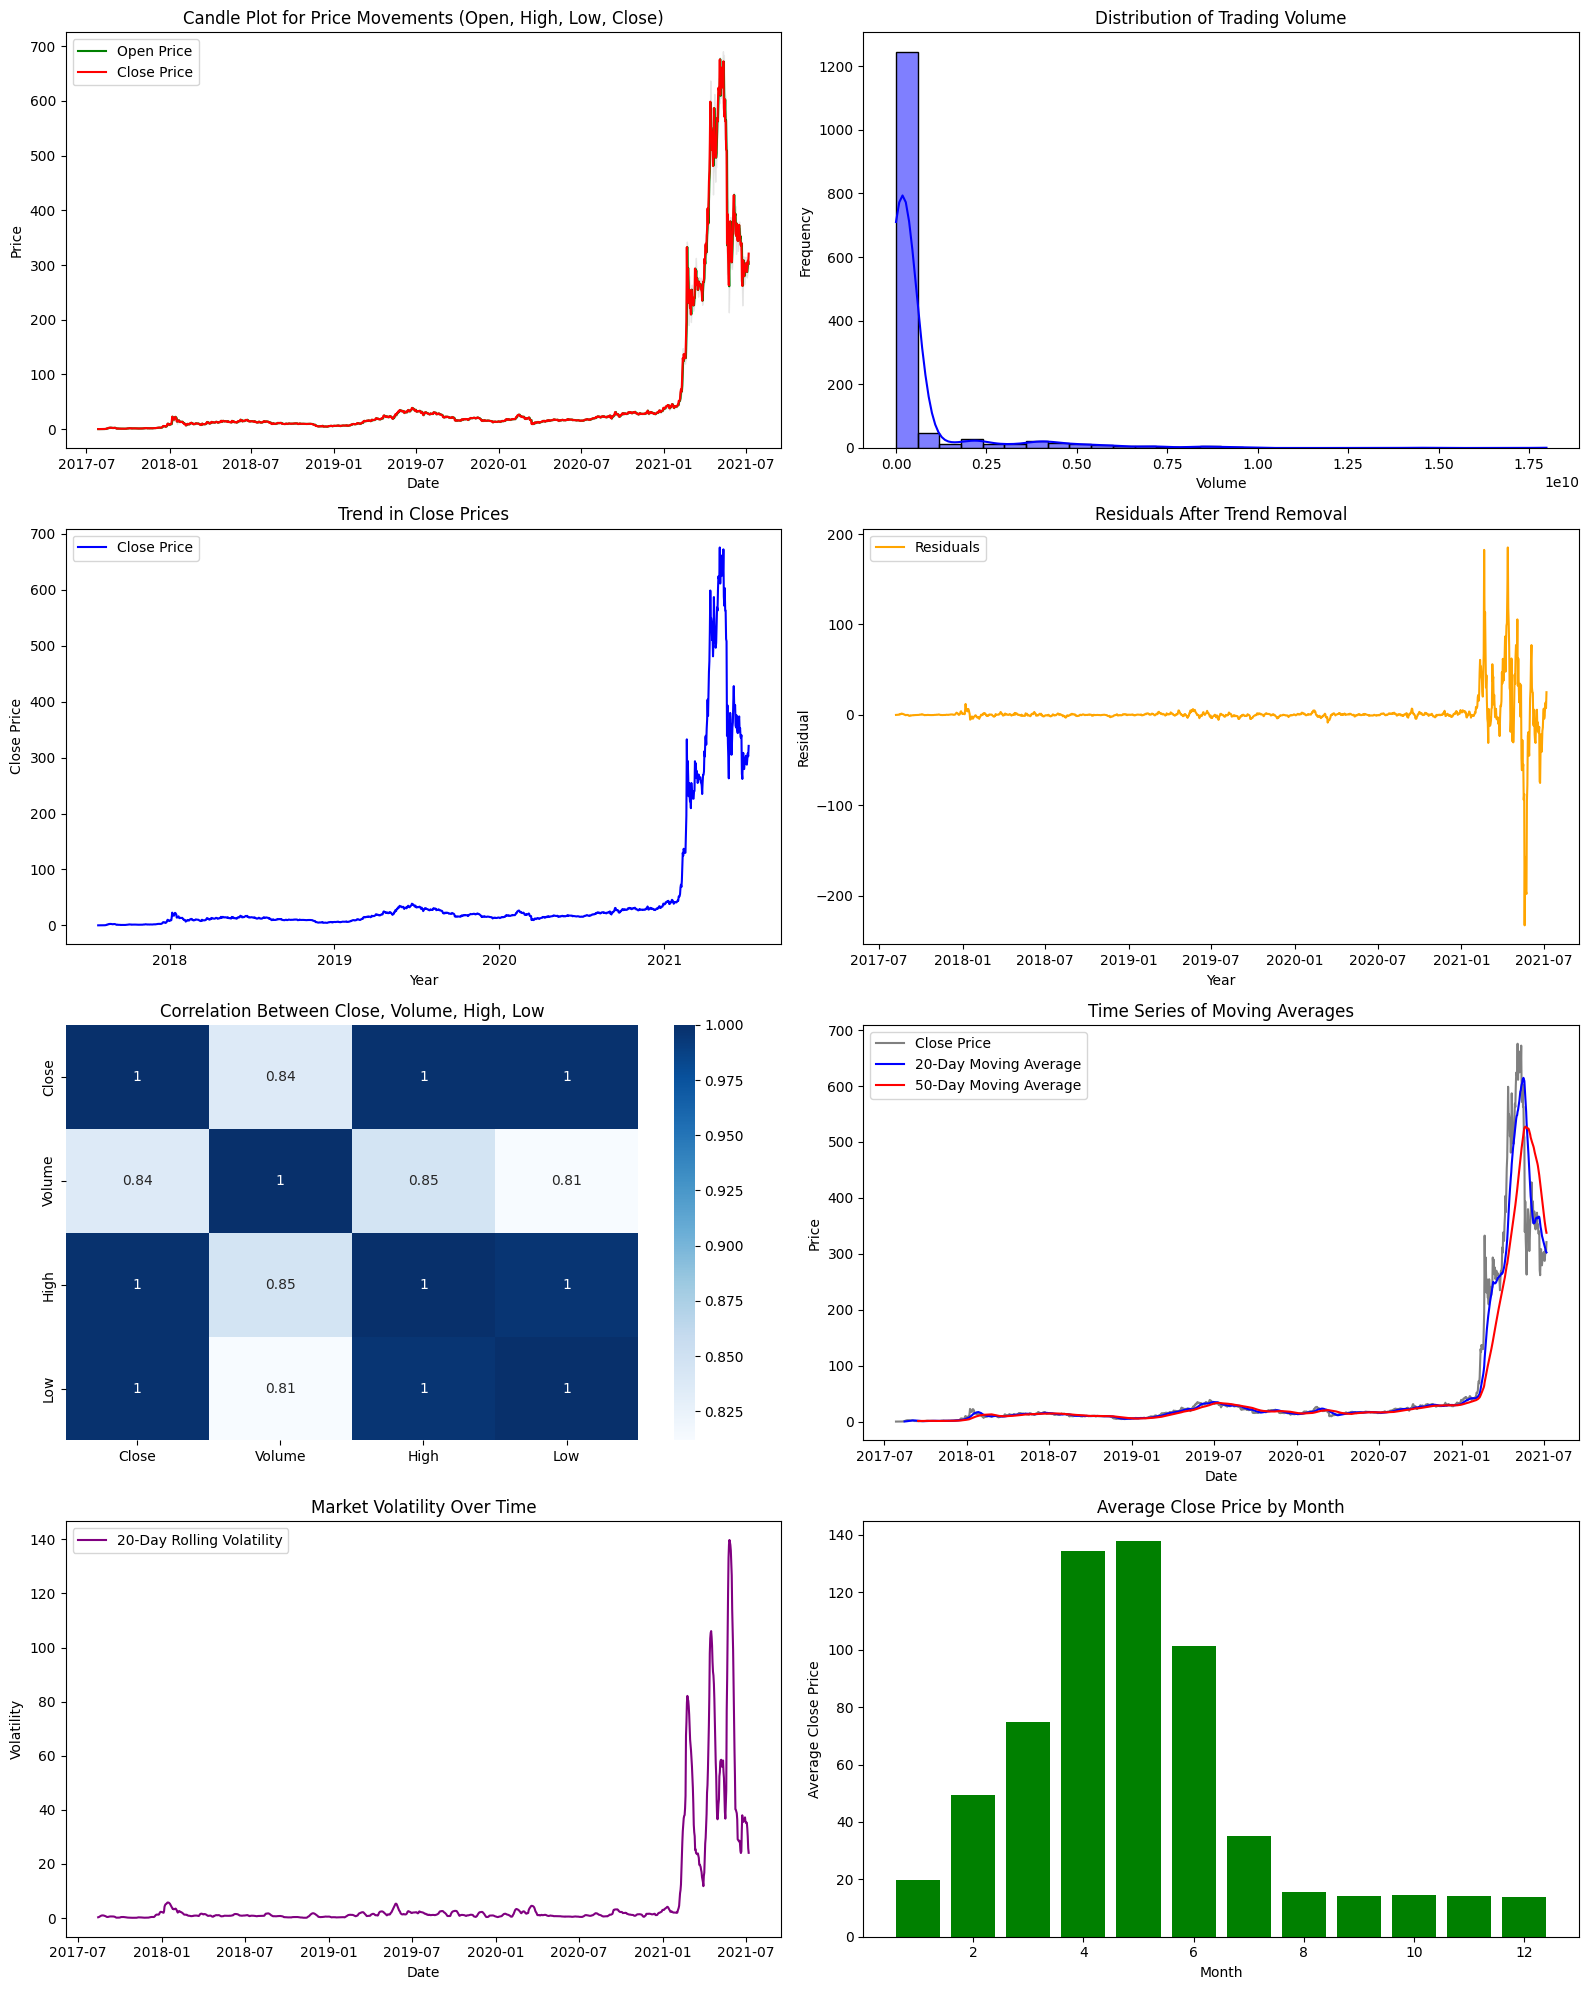

In [14]:
fig, axs = plt.subplots(4, 2, figsize=(16, 20))

axs[0, 0].plot(df['Date'], df['Open'], label='Open Price', color='green')
axs[0, 0].plot(df['Date'], df['Close'], label='Close Price', color='red')
axs[0, 0].fill_between(df['Date'], df['Low'], df['High'], color='lightgrey', alpha=0.5)
axs[0, 0].set_title('Candle Plot for Price Movements (Open, High, Low, Close)')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Price')
axs[0, 0].legend()

sns.histplot(df['Volume'], bins=30, kde=True, ax=axs[0, 1], color='blue')
axs[0, 1].set_title('Distribution of Trading Volume')
axs[0, 1].set_xlabel('Volume')
axs[0, 1].set_ylabel('Frequency')
axs[1, 0].plot(df['Date'], df['Close'], label='Close Price', color='blue')
axs[1, 0].xaxis.set_major_locator(mdates.YearLocator())
axs[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[1, 0].set_title('Trend in Close Prices')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Close Price')
axs[1, 0].legend()

axs[1, 1].plot(df['Date'], df['Close'] - df['Close'].rolling(window=12).mean(), color='orange', label='Residuals')
axs[1, 1].set_title('Residuals After Trend Removal')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Residual')
axs[1, 1].legend()

sns.heatmap(df[['Close', 'Volume', 'High', 'Low']].corr(), annot=True, cmap='Blues', ax=axs[2, 0])
axs[2, 0].set_title('Correlation Between Close, Volume, High, Low')

axs[2, 1].plot(df['Date'], df['Close'], label='Close Price', color='grey')
axs[2, 1].plot(df['Date'], df['MA_20'], label='20-Day Moving Average', color='blue')
axs[2, 1].plot(df['Date'], df['MA_50'], label='50-Day Moving Average', color='red')
axs[2, 1].set_title('Time Series of Moving Averages')
axs[2, 1].set_xlabel('Date')
axs[2, 1].set_ylabel('Price')
axs[2, 1].legend()

axs[3, 0].plot(df['Date'], df['Volatility'], label='20-Day Rolling Volatility', color='purple')
axs[3, 0].set_title('Market Volatility Over Time')
axs[3, 0].set_xlabel('Date')
axs[3, 0].set_ylabel('Volatility')
axs[3, 0].legend()
monthly_avg_close = df.groupby('month')['Close'].mean()
axs[3, 1].bar(monthly_avg_close.index, monthly_avg_close, color='green')
axs[3, 1].set_title('Average Close Price by Month')
axs[3, 1].set_xlabel('Month')
axs[3, 1].set_ylabel('Average Close Price')

plt.tight_layout()
plt.show()


# Machine Learning Algorhtms

This code compares the performance of various regression models on synthetic data. It starts by generating a dataset with one feature and a target variable using `make_regression`. The data is split into training and testing sets. Several regression models are then applied to the training data: Linear Regression, Ridge Regression, Lasso Regression, Polynomial Regression (with a quadratic feature), and Support Vector Regression (SVR). Each model is trained and used to make predictions on the test set. The performance of each model is evaluated using mean absolute error, mean squared error, and R^2 score. 

The results are visualized in a 2x3 grid of subplots, where each subplot shows the actual versus predicted values for each regression method. The plots help to visually compare how well each model fits the data and to identify the strengths and weaknesses of each approach. For Polynomial Regression, a smooth curve is plotted to show how it captures non-linearity, while SVR uses scatter points to show its predictions. This comprehensive approach allows for a clear comparison of the different regression techniques on the same dataset.

Linear Regression - Mean Absolute Error: 0.08416659922209009
Linear Regression - Mean Squared Error: 0.010420222653186971
Linear Regression - R^2 Score: 0.9999925261586983

Ridge Regression - Mean Absolute Error: 0.49721695196500415
Ridge Regression - Mean Squared Error: 0.3439908943949024
Ridge Regression - R^2 Score: 0.9997532746238247

Lasso Regression - Mean Absolute Error: 0.12228150412222272
Lasso Regression - Mean Squared Error: 0.02484317183582509
Lasso Regression - R^2 Score: 0.9999821813861458

Polynomial Regression - Mean Absolute Error: 0.08413678282308715
Polynomial Regression - Mean Squared Error: 0.010543469582604726
Polynomial Regression - R^2 Score: 0.999992437760588

SVR - Mean Absolute Error: 15.808370544453501
SVR - Mean Squared Error: 515.5549339674474
SVR - R^2 Score: 0.6302213602313782



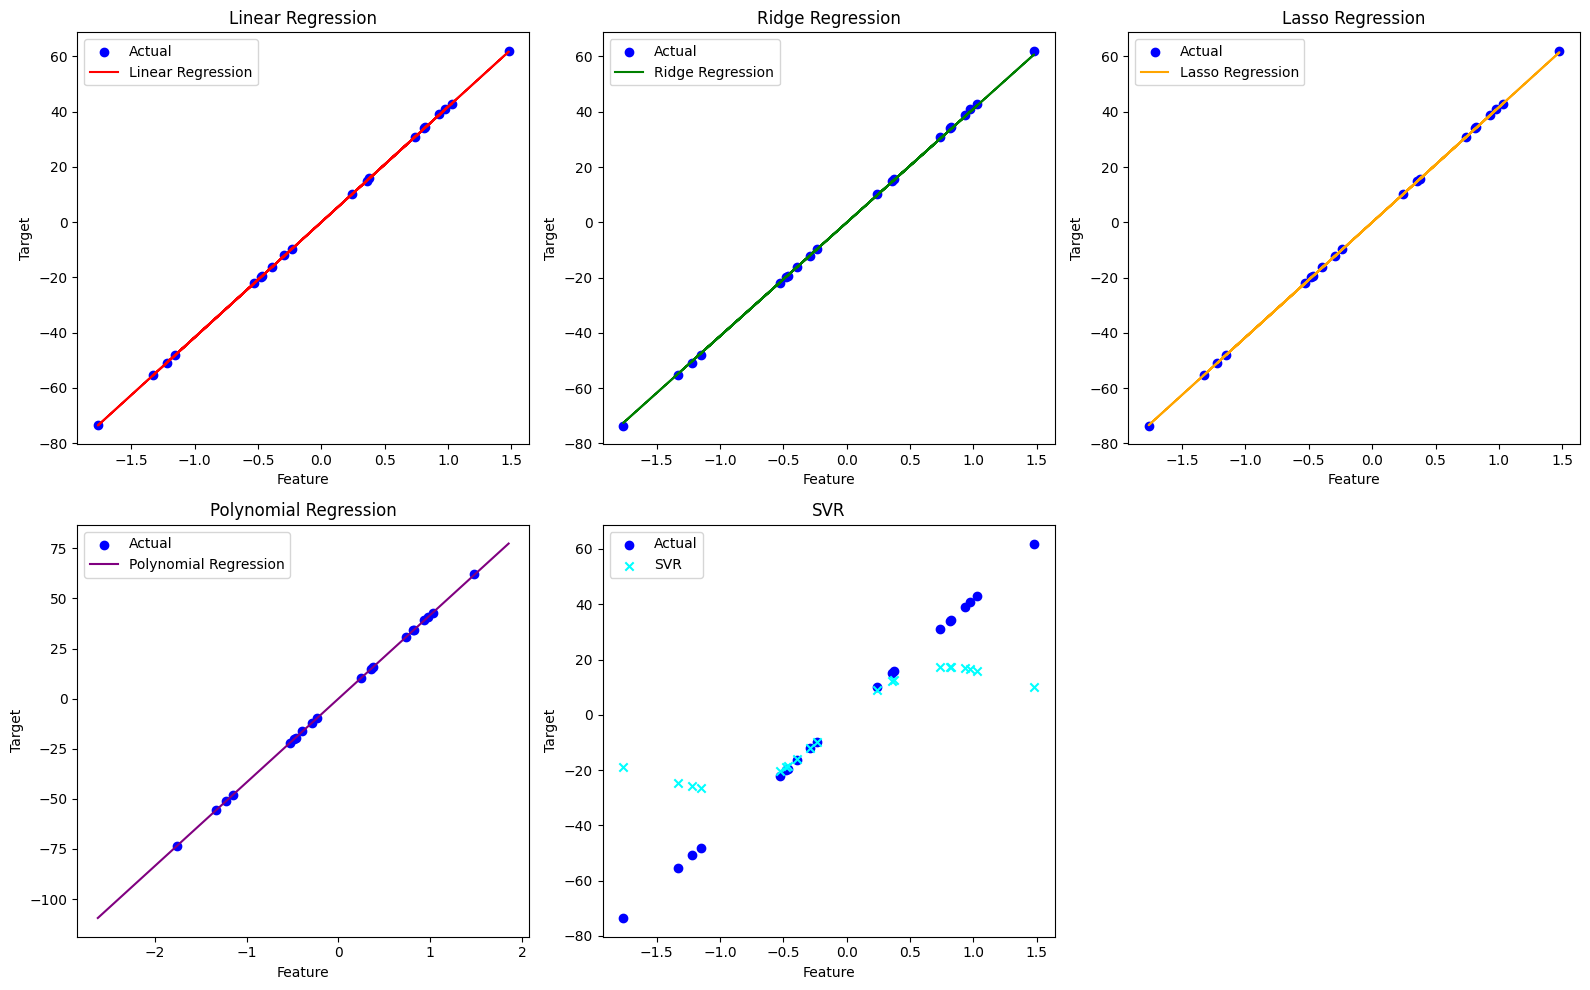

In [15]:
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)


lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)


poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)
X_test_poly = poly.transform(X_test)
y_pred_poly = poly_reg.predict(X_test_poly)


svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} - Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
    print(f"{model_name} - Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
    print(f"{model_name} - R^2 Score: {r2_score(y_test, y_pred)}\n")

evaluate_model(y_test, y_pred_lr, 'Linear Regression')
evaluate_model(y_test, y_pred_ridge, 'Ridge Regression')
evaluate_model(y_test, y_pred_lasso, 'Lasso Regression')
evaluate_model(y_test, y_pred_poly, 'Polynomial Regression')
evaluate_model(y_test, y_pred_svr, 'SVR')


plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_lr, color='red', label='Linear Regression')
plt.title('Linear Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()


plt.subplot(2, 3, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_ridge, color='green', label='Ridge Regression')
plt.title('Ridge Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()


plt.subplot(2, 3, 3)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_lasso, color='orange', label='Lasso Regression')
plt.title('Lasso Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()


plt.subplot(2, 3, 4)
plt.scatter(X_test, y_test, color='blue', label='Actual')
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
plt.plot(X_range, poly_reg.predict(X_range_poly), color='purple', label='Polynomial Regression')
plt.title('Polynomial Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

plt.subplot(2, 3, 5)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_svr, color='cyan', label='SVR', marker='x')
plt.title('SVR')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

plt.tight_layout()
plt.show()

### Classification Algorithms

The code generates two plots side by side using a single figure with two subplots. The first subplot displays the feature importances of the RandomForestRegressor model, providing insights into which features contribute most to the prediction of the target variable 'Close'. The second subplot visualizes the comparison between the actual and predicted 'Close' prices over time, allowing for a visual assessment of the model's performance. By placing these plots in one row, the layout is more compact and easier to compare.

Mean Squared Error: 64897.0395621682


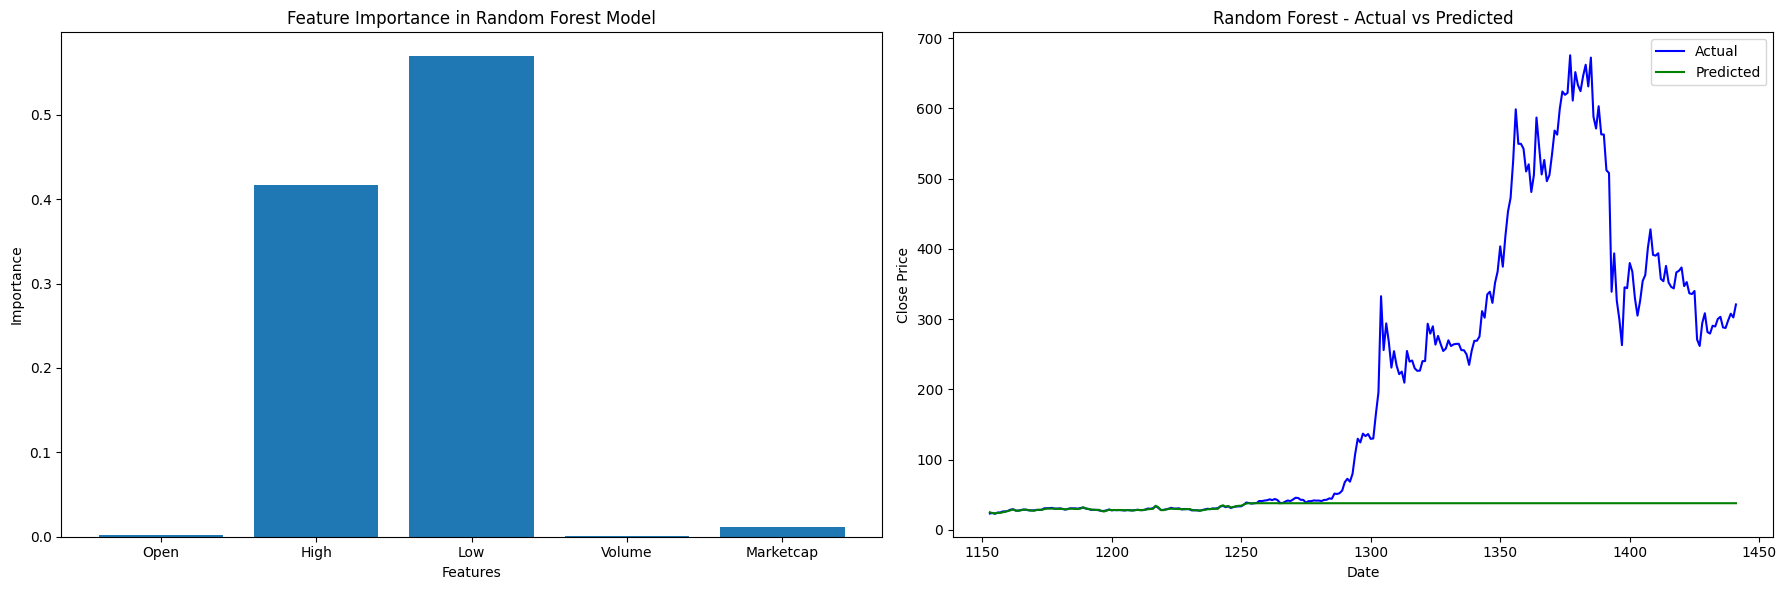

In [16]:
X = df[['Open', 'High', 'Low', 'Volume', 'Marketcap']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.bar(X.columns, model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest Model')

plt.subplot(1, 2, 2)
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='green')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Random Forest - Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

This code performs classification on scaled features using two different models: a Random Forest Classifier and a Support Vector Classifier (SVC). It begins by splitting the dataset into training and testing sets, with the target variable generated as random binary values. The Random Forest Classifier is trained on the training data, and its predictions on the test set are evaluated. Similarly, the SVC is trained and evaluated. The results are visualized with confusion matrices for both models, plotted side by side in a single figure, which shows the true vs. predicted classifications and helps in comparing the performance of the models. Additionally, classification reports for both models are printed, providing detailed metrics such as precision, recall, and F1-score, offering insights into the models' performance across different classes.

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.51      0.45       122
           1       0.57      0.47      0.51       167

    accuracy                           0.48       289
   macro avg       0.49      0.49      0.48       289
weighted avg       0.50      0.48      0.49       289

SVC Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.75      0.54       122
           1       0.58      0.25      0.35       167

    accuracy                           0.46       289
   macro avg       0.50      0.50      0.44       289
weighted avg       0.51      0.46      0.43       289



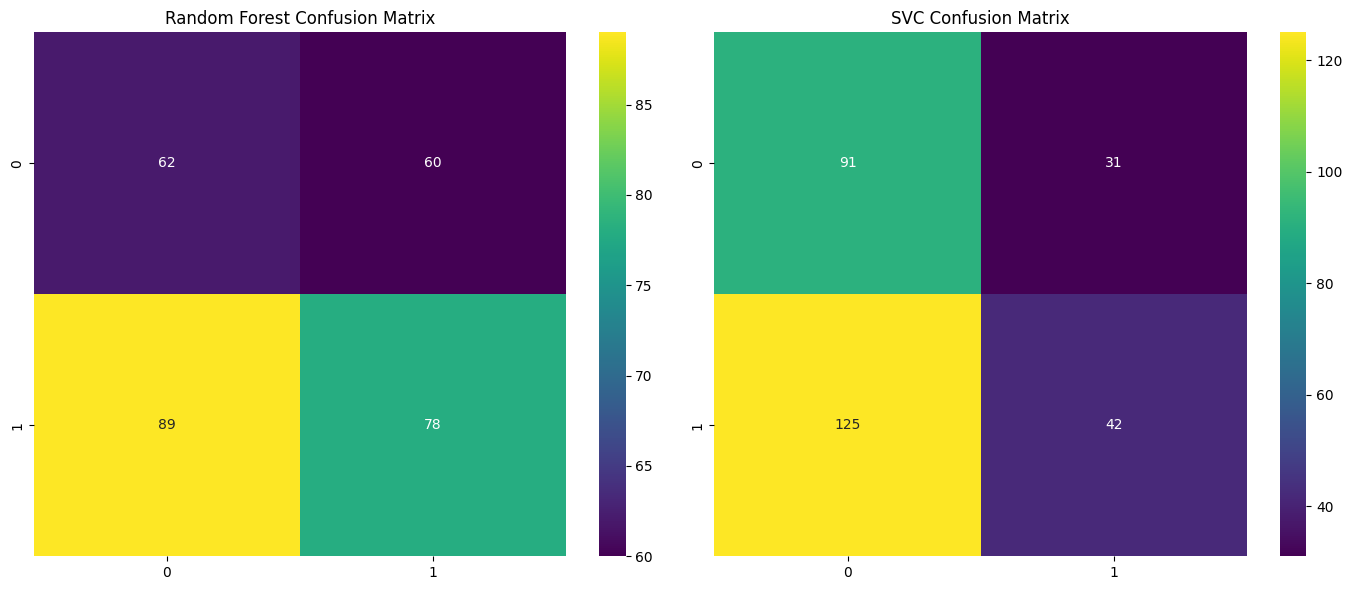

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, np.random.randint(2, size=features_scaled.shape[0]), test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("SVC Classification Report:\n", classification_report(y_test, y_pred_svc))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='viridis', ax=axs[0])
axs[0].set_title("Random Forest Confusion Matrix")


conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='viridis', ax=axs[1])
axs[1].set_title("SVC Confusion Matrix")

plt.tight_layout()
plt.show()



This code snippet demonstrates a comprehensive workflow for training and evaluating multiple machine learning classifiers on synthetic classification data. First, it generates a synthetic dataset with 1000 samples and 20 features, and then splits the data into training and test sets. It trains six different classifiers—Logistic Regression, K-Nearest Neighbors (KNN), Support Vector Classifier (SVC), Decision Tree Classifier, Random Forest Classifier, and Gradient Boosting Classifier—on the training data. Each model's predictions are evaluated on the test set using accuracy, confusion matrix, and classification report. The results for each model are printed out, and the confusion matrices are visualized using heatmaps for better comparative analysis.

Logistic Regression - Accuracy: 0.855
Logistic Regression - Confusion Matrix:
[[85  8]
 [21 86]]
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        93
           1       0.91      0.80      0.86       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200


K-Nearest Neighbors - Accuracy: 0.81
K-Nearest Neighbors - Confusion Matrix:
[[82 11]
 [27 80]]
K-Nearest Neighbors - Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        93
           1       0.88      0.75      0.81       107

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200


Support Vector Classifier - Accuracy: 0.845
Support Vector Cl

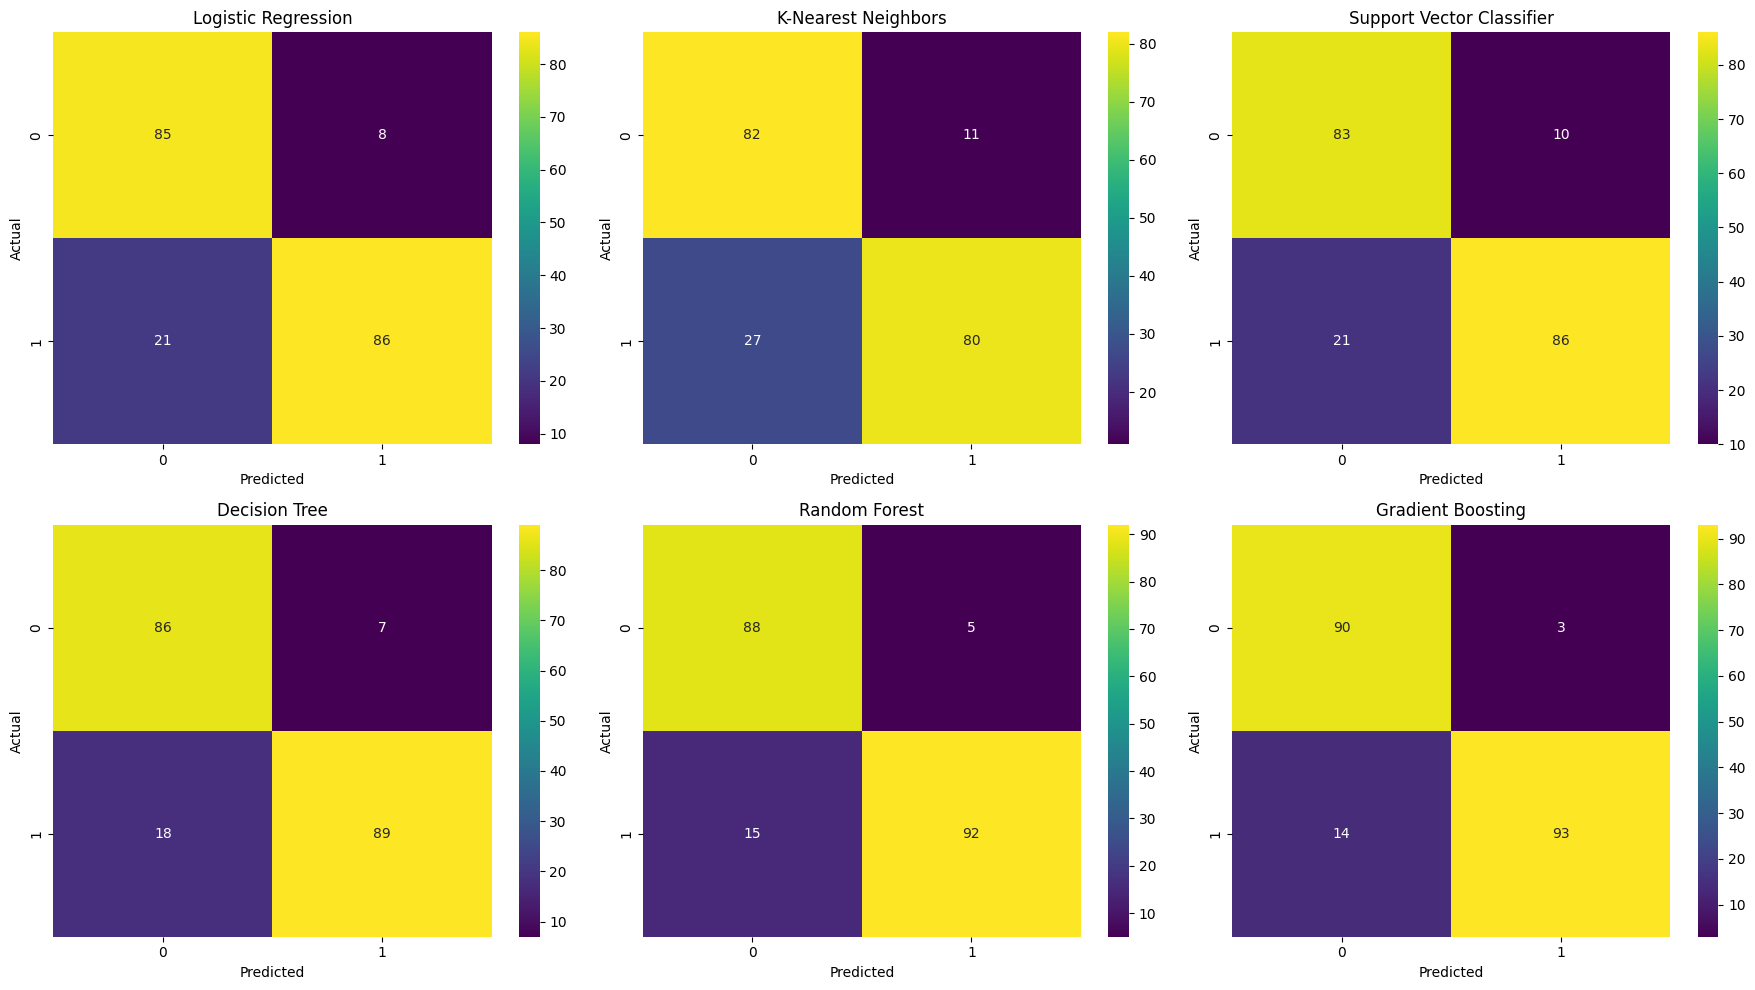

In [ ]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)


dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)


def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} - Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"{model_name} - Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"{model_name} - Classification Report:\n{classification_report(y_test, y_pred)}\n")

evaluate_model(y_test, y_pred_lr, 'Logistic Regression')
evaluate_model(y_test, y_pred_knn, 'K-Nearest Neighbors')
evaluate_model(y_test, y_pred_svc, 'Support Vector Classifier')
evaluate_model(y_test, y_pred_dt, 'Decision Tree')
evaluate_model(y_test, y_pred_rf, 'Random Forest')
evaluate_model(y_test, y_pred_gb, 'Gradient Boosting')


fig, axs = plt.subplots(2, 3, figsize=(18, 10))

def plot_confusion_matrix(ax, y_test, y_pred, title):
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plot_confusion_matrix(axs[0, 0], y_test, y_pred_lr, 'Logistic Regression')
plot_confusion_matrix(axs[0, 1], y_test, y_pred_knn, 'K-Nearest Neighbors')
plot_confusion_matrix(axs[0, 2], y_test, y_pred_svc, 'Support Vector Classifier')
plot_confusion_matrix(axs[1, 0], y_test, y_pred_dt, 'Decision Tree')
plot_confusion_matrix(axs[1, 1], y_test, y_pred_rf, 'Random Forest')
plot_confusion_matrix(axs[1, 2], y_test, y_pred_gb, 'Gradient Boosting')

plt.tight_layout()
plt.show()

### Clustering Algorithms


This code performs clustering on a dataset using two different algorithms: K-Means and DBSCAN. First, it applies K-Means clustering with 3 clusters to the PCA-reduced features (`features_pca`) and computes the silhouette score to evaluate the quality of the clustering. The silhouette score provides a measure of how similar each sample is to its own cluster compared to other clusters. Next, it applies DBSCAN clustering to the scaled features (`features_scaled`) and calculates the silhouette score for this method as well. The results are then visualized in two subplots: one for K-Means clustering and one for DBSCAN. The scatter plots illustrate how the clusters are distributed in the reduced feature space, with different colors representing different clusters. This visualization helps in comparing the clustering results of the two algorithms.

K-Means Silhouette Score: 0.6085347280589494
DBSCAN Silhouette Score: 0.5926854697753161


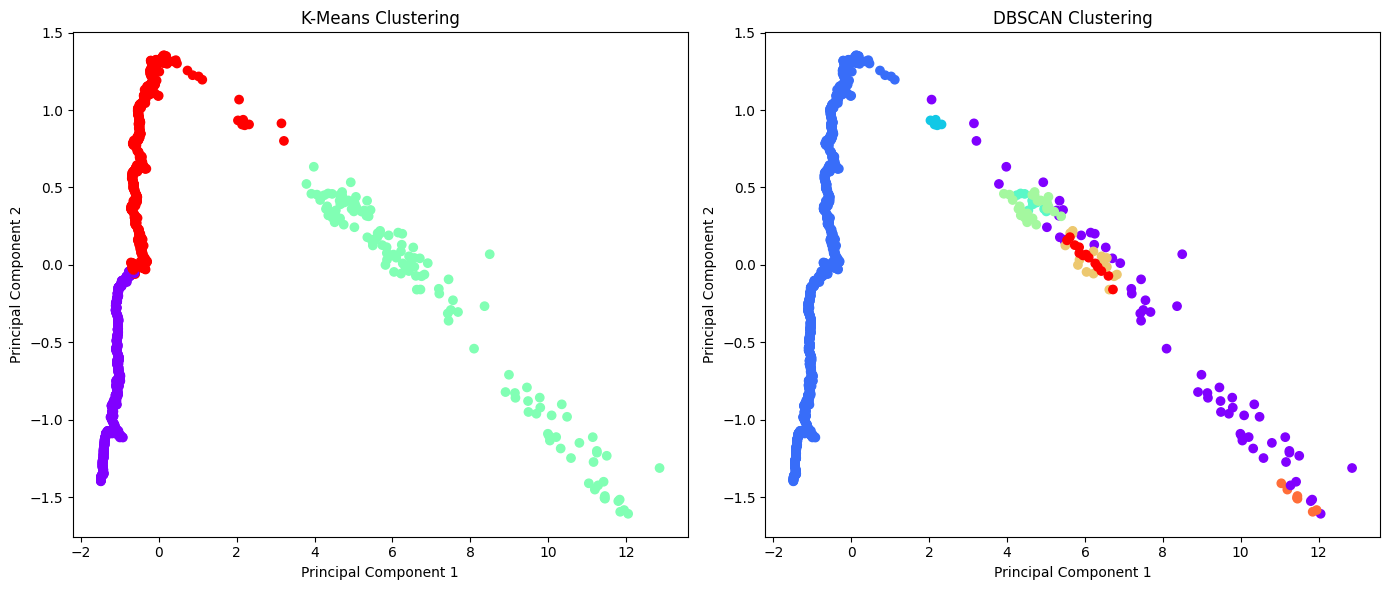

In [17]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(features_pca)

silhouette_avg_kmeans = silhouette_score(features_pca, clusters_kmeans)
print(f'K-Means Silhouette Score: {silhouette_avg_kmeans}')

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(features_scaled)

silhouette_avg_dbscan = silhouette_score(features_scaled, clusters_dbscan)
print(f'DBSCAN Silhouette Score: {silhouette_avg_dbscan}')

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

scatter_kmeans = axs[0].scatter(features_pca[:, 0], features_pca[:, 1], c=clusters_kmeans, cmap='rainbow')
axs[0].set_title('K-Means Clustering')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')

scatter_dbscan = axs[1].scatter(features_pca[:, 0], features_pca[:, 1], c=clusters_dbscan, cmap='rainbow')
axs[1].set_title('DBSCAN Clustering')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

# Deep Learning Algorithms


This code sets up and trains an autoencoder for unsupervised learning on scaled features. The autoencoder architecture consists of an encoder and a decoder. The encoder compresses the input data into a lower-dimensional representation with two dense layers (16 and 8 units), and the decoder reconstructs the original data from this compressed representation with two dense layers (16 units and the final layer matching the input dimension). The model is compiled with the Adam optimizer and mean squared error loss function, suitable for reconstructing the input data. The autoencoder is trained for 50 epochs with a batch size of 32, using 20% of the data for validation. After training, the loss values for both training and validation sets are plotted against the epochs to visualize how well the model learned to reconstruct the input data and to monitor overfitting.

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.7757 - val_loss: 3.1720
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6564 - val_loss: 3.3323
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4585 - val_loss: 3.5784
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2871 - val_loss: 3.7507
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2224 - val_loss: 3.8193
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2042 - val_loss: 3.8301
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1979 - val_loss: 3.8195
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1971 - val_loss: 3.7772
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1970 - val_loss: 3.7274
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1903 - val_loss: 3.7323
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1870 - val_loss: 3.7428
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1853 - val_l

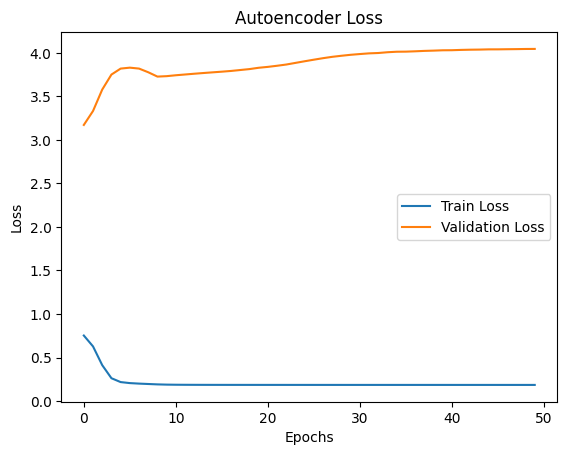

In [19]:

input_dim = features_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoder = Dense(16, activation="relu")(input_layer)
encoder = Dense(8, activation="relu")(encoder)
decoder = Dense(16, activation="relu")(encoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

history = autoencoder.fit(features_scaled, features_scaled, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Autoencoder Loss')
plt.show()


### Evaluating MLP Acuracy

This code snippet demonstrates the process of training and evaluating a Multi-Layer Perceptron (MLP) neural network on synthetic classification data. First, it generates a dataset with 1000 samples and 20 features, and splits it into training and test sets. It then standardizes the features using `StandardScaler`. An MLP model is created with three layers: two dense hidden layers with ReLU activation and an output layer with a sigmoid activation function. The model is compiled with the Adam optimizer and binary cross-entropy loss, and is trained for 10 epochs with a batch size of 32. After training, the model's performance is evaluated on the test set, and the accuracy is printed.

In [21]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_mlp = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model_mlp.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


loss, accuracy = model_mlp.evaluate(X_test, y_test)
print(f'MLP Accuracy: {accuracy}')

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5954 - loss: 0.6761 - val_accuracy: 0.7375 - val_loss: 0.5581
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7959 - loss: 0.5204 - val_accuracy: 0.8188 - val_loss: 0.4632
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8393 - loss: 0.4356 - val_accuracy: 0.8750 - val_loss: 0.3951
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8444 - loss: 0.3862 - val_accuracy: 0.8813 - val_loss: 0.3497
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8594 - loss: 0.3707 - val_accuracy: 0.8875 - val_loss: 0.3224
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8794 - loss: 0.3088 - val_accuracy: 0.8875 - val_loss: 0.3012
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8876 - loss: 0.3251 - val_accuracy: 0.9000 - val_loss: 0.2843
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8704 - loss: 0.3070 - val_accuracy: 0.8875 - val_loss

### Evaluating RNN accuracy

This code snippet outlines the process of training and evaluating a Recurrent Neural Network (RNN) on sequential data. It begins by generating synthetic sequential data with 1000 samples, each consisting of 50 features, and binary labels. The data is then split into training and test sets. An RNN model is defined with an embedding layer, two SimpleRNN layers (the first with 128 units and the second with 64 units), and a final dense layer with a sigmoid activation function for binary classification. The model is compiled with the Adam optimizer and binary cross-entropy loss, and trained for 10 epochs with a batch size of 32. After training, the model is evaluated on the test set, and the accuracy is printed.

In [22]:
X_sequential = np.random.randint(1, 1000, (1000, 50))
y_sequential = np.random.randint(0, 2, 1000)

X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_sequential, y_sequential, test_size=0.2, random_state=42)


model_rnn = Sequential([
    Embedding(input_dim=1000, output_dim=64, input_length=X_train_seq.shape[1]),
    SimpleRNN(128, return_sequences=True),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_rnn.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_split=0.2)

loss, accuracy = model_rnn.evaluate(X_test_seq, y_test_seq)
print(f'RNN Accuracy: {accuracy}')

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.5298 - loss: 0.7239 - val_accuracy: 0.5688 - val_loss: 0.6875
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5663 - loss: 0.6600 - val_accuracy: 0.4313 - val_loss: 0.8685
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8193 - loss: 0.3796 - val_accuracy: 0.5000 - val_loss: 0.9060
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9760 - loss: 0.1292 - val_accuracy: 0.4062 - val_loss: 1.2985
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9906 - loss: 0.0420 - val_accuracy: 0.5188 - val_loss: 1.2757
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 1.0000 - loss: 0.0153 - val_accuracy: 0.4875 - val_loss: 1.4945
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 0.5000 - val_loss: 1.4285
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.5063 - v

### Evaluating LSTM

This code snippet focuses on training and evaluating a Long Short-Term Memory (LSTM) network on sequential data. It starts with generating synthetic sequential data with 1000 samples and 50 features, and then splits this data into training and test sets. An LSTM model is constructed with an embedding layer to handle the input sequence, followed by two LSTM layers (the first with 128 units and the second with 64 units), and a dense output layer with a sigmoid activation function for binary classification. The model is compiled using the Adam optimizer and binary cross-entropy loss, then trained for 10 epochs with a batch size of 32. After training, the model’s performance is evaluated on the test set, and the accuracy is printed.

In [23]:
model_lstm = Sequential([
    Embedding(input_dim=1000, output_dim=64, input_length=X_train_seq.shape[1]),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model_lstm.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_split=0.2)

loss, accuracy = model_lstm.evaluate(X_test_seq, y_test_seq)
print(f'LSTM Accuracy: {accuracy}')

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - accuracy: 0.4748 - loss: 0.6938 - val_accuracy: 0.4313 - val_loss: 0.6967
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.5822 - loss: 0.6845 - val_accuracy: 0.4625 - val_loss: 0.7053
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.8107 - loss: 0.5069 - val_accuracy: 0.5562 - val_loss: 0.8657
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.9239 - loss: 0.2072 - val_accuracy: 0.5188 - val_loss: 1.3229
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.9575 - loss: 0.1204 - val_accuracy: 0.5500 - val_loss: 1.4106
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.9955 - loss: 0.0394 - val_accuracy: 0.5250 - val_loss: 1.8345
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.9989 - loss: 0.0167 - val_accuracy: 0.5250 - val_loss: 1.9627
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 0.5000 - 

### Evaluating Autoencoder Loss

This code snippet demonstrates the process of building and training an autoencoder for unsupervised learning. It begins by defining the architecture of the autoencoder with a specified input dimension and encoding dimension. The autoencoder consists of an input layer, an encoding layer (with a ReLU activation function), and a decoding layer (with a sigmoid activation function) to reconstruct the input data. The model is compiled with the Adam optimizer and binary cross-entropy loss. The autoencoder is trained on the training data, where both the input and output are the same (for reconstruction purposes) over 10 epochs with a batch size of 256. After training, the autoencoder’s performance is evaluated on the test data, and the reconstruction loss is printed.

In [24]:
input_dim = X_train.shape[1]
encoding_dim = 32

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(X_train, X_train, epochs=10, batch_size=256, validation_split=0.2)

loss = autoencoder.evaluate(X_test, X_test)
print(f'Autoencoder Loss: {loss}')

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 330ms/step - loss: 0.7083 - val_loss: 0.6808
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.6834 - val_loss: 0.6554
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.6566 - val_loss: 0.6304
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.6252 - val_loss: 0.6057
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.6045 - val_loss: 0.5813
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.5801 - val_loss: 0.5571
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.5544 - val_loss: 0.5333
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.5317 - val_loss: 0.5096
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.5044 - val_loss: 0.4861
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.4785 - val_loss: 0.4627
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4817 
Autoencoder Loss: 0.47501417994499207


### Evaluating the ANN Accuracy

This code snippet outlines the steps for training and evaluating an Artificial Neural Network (ANN) on a synthetic classification dataset. It starts by generating a dataset with 1000 samples and 20 features, then splits it into training and test sets. The features are standardized using `StandardScaler`. An ANN model is defined with an input layer, two hidden layers (the first with 128 units and ReLU activation, and the second with 64 units and ReLU activation), and an output layer with a sigmoid activation function for binary classification. The model is compiled with the Adam optimizer and binary cross-entropy loss. It is then trained for 10 epochs with a batch size of 32 and a validation split of 20%. After training, the model is evaluated on the test set, and the accuracy is printed.

In [25]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_ann = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_ann = model_ann.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss_ann, accuracy_ann = model_ann.evaluate(X_test, y_test)
print(f'ANN Accuracy: {accuracy_ann}')

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6305 - loss: 0.6526 - val_accuracy: 0.8438 - val_loss: 0.4873
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8329 - loss: 0.4502 - val_accuracy: 0.8625 - val_loss: 0.3652
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8826 - loss: 0.3409 - val_accuracy: 0.8750 - val_loss: 0.3082
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8884 - loss: 0.3005 - val_accuracy: 0.8687 - val_loss: 0.2902
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8754 - loss: 0.3118 - val_accuracy: 0.8750 - val_loss: 0.2796
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9051 - loss: 0.2670 - val_accuracy: 0.8813 - val_loss: 0.2720
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9022 - loss: 0.2427 - val_accuracy: 0.8750 - val_loss: 0.2652
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9134 - loss: 0.2394 - val_accuracy: 0.8687 - val_loss

This code snippet demonstrates the training of several different types of neural network models using both image and sequential data.

1. **CNN (Convolutional Neural Network)**: A CNN model is defined for image data with an input shape of (150, 150, 3), including a Conv2D layer, a MaxPooling2D layer, a Flatten layer, and two Dense layers (with dropout applied). The model is compiled and trained on dummy image data for 10 epochs.

2. **RNN (Recurrent Neural Network)**: An RNN model is constructed with an Embedding layer, two SimpleRNN layers, and a Dense output layer. This model is trained on synthetic sequential data for 10 epochs.

3. **LSTM (Long Short-Term Memory Network)**: An LSTM model is set up with an Embedding layer, two LSTM layers, and a Dense output layer. It is trained on the same synthetic sequential data as the RNN model for 10 epochs.

4. **Autoencoder**: An autoencoder is defined with an input layer, an encoding layer, and a decoding layer to reconstruct the input data. The model is trained on the same synthetic feature data as used in the ANN example for 10 epochs.

Each model is trained with a validation split of 20% and uses the Adam optimizer and binary cross-entropy loss. The training history for each model is stored in variables for further analysis.

In [26]:
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

X_train_cnn = np.random.rand(100, 150, 150, 3)
y_train_cnn = np.random.randint(0, 2, 100)

history_cnn = model_cnn.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=32, validation_split=0.2)

model_rnn = Sequential([
    Embedding(input_dim=1000, output_dim=64, input_length=50),
    SimpleRNN(128, return_sequences=True),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_rnn = model_rnn.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_split=0.2)

# LSTM Training
model_lstm = Sequential([
    Embedding(input_dim=1000, output_dim=64, input_length=50),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_lstm = model_lstm.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_split=0.2)


input_dim = X_train.shape[1]
encoding_dim = 32
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

history_autoencoder = autoencoder.fit(X_train, X_train, epochs=10, batch_size=256, validation_split=0.2)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 402ms/step - accuracy: 0.3219 - loss: 15.7728 - val_accuracy: 0.5500 - val_loss: 3.4025
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 301ms/step - accuracy: 0.4578 - loss: 4.3366 - val_accuracy: 0.4500 - val_loss: 1.0498
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step - accuracy: 0.5117 - loss: 1.3221 - val_accuracy: 0.4500 - val_loss: 0.7779
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 294ms/step - accuracy: 0.4930 - loss: 1.0961 - val_accuracy: 0.4500 - val_loss: 0.7061
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 295ms/step - accuracy: 0.4594 - loss: 0.6843 - val_accuracy: 0.4500 - val_loss: 0.6932
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 360ms/step - accuracy: 0.4031 - loss: 0.8385 - val_accuracy: 0.5500 - val_loss: 0.6931
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 324ms/step - accuracy: 0.4750 - loss: 0.6946 - val_accuracy: 0.4500 - val_loss: 0.7134
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 334ms/step - accuracy: 0.5648 - loss: 0.6728 - val_accuracy: 0.4500 - val_loss

This code snippet is used to visualize the training and validation accuracy of different neural network models over epochs. 

1. **`plot_history` Function**: This function takes the training history of a model, a title, and an axis object as inputs. It plots the training and validation accuracy curves from the `history` object onto the provided axis.

2. **Subplots Creation**: It creates a figure with three subplots arranged in one row and three columns, using `plt.subplots`.

3. **Plotting**: The `plot_history` function is called three times to plot the training history of an Artificial Neural Network (ANN), a Convolutional Neural Network (CNN), and a Recurrent Neural Network (RNN) on separate subplots.

4. **Display**: `plt.tight_layout()` adjusts the spacing between subplots, and `plt.show()` displays the combined plots.

This visualization helps compare the performance of the different models by showing their accuracy trends during training.

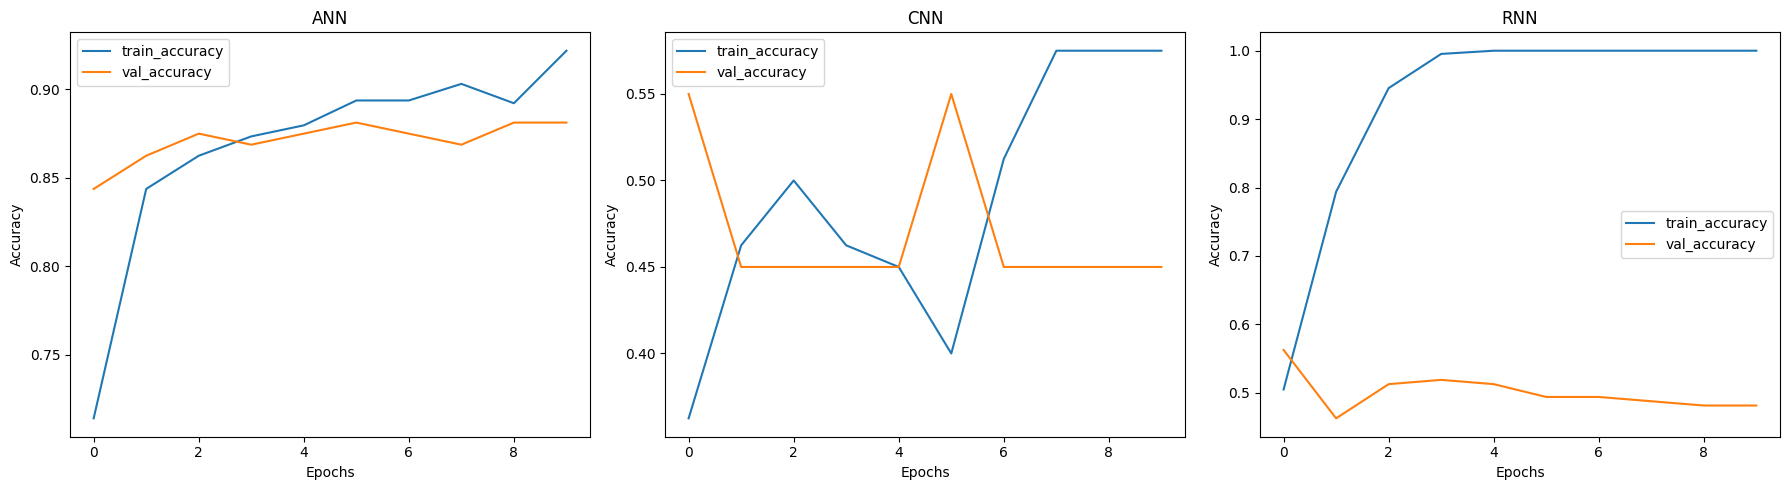

In [27]:
def plot_history(history, title, ax):
    ax.plot(history.history['accuracy'], label='train_accuracy')
    ax.plot(history.history['val_accuracy'], label='val_accuracy')
    ax.set_title(title)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.legend()

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

plot_history(history_ann, 'ANN', axs[0])
plot_history(history_cnn, 'CNN', axs[1])
plot_history(history_rnn, 'RNN', axs[2])

plt.tight_layout()
plt.show()